___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import MinMaxScaler


from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix,average_precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve,precision_recall_curve 
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


# Ingest the data to notebook

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [4]:
df.shape

(303, 14)

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [7]:
#Before converting object,drop outlier thal=0
df=df[df.thal>0.5]

In [8]:
object_col=["sex","cp","fbs","restecg","exang","slope","thal"]

In [9]:
for feature in object_col:
    df[feature]=df[feature].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    object 
 2   cp        301 non-null    object 
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    object 
 6   restecg   301 non-null    object 
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    object 
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    object 
 11  ca        301 non-null    int64  
 12  thal      301 non-null    object 
 13  target    301 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 35.3+ KB


In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [12]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,ca,target
count,301.000,301.000,301.000,301.000,301.000,301.000,301.000
mean,54.379,131.648,246.505,149.741,1.043,0.734,0.545
std,9.111,17.594,51.916,22.891,1.163,1.024,0.499
min,29.000,94.000,126.000,71.000,0.000,0.000,0.000
25%,47.000,120.000,211.000,134.000,0.000,0.000,0.000
50%,56.000,130.000,241.000,153.000,0.800,0.000,1.000
75%,61.000,140.000,275.000,166.000,1.600,1.000,1.000
max,77.000,200.000,564.000,202.000,6.200,4.000,1.000


In [13]:
df.target.value_counts()

1    164
0    137
Name: target, dtype: int64

<AxesSubplot:>

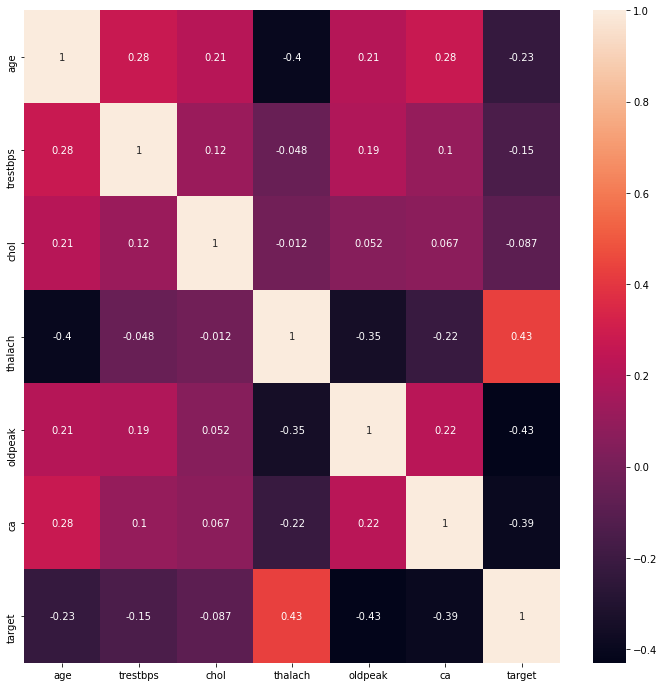

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [15]:
for feature in df.columns:
    print(f"The feature is : {feature}\n{df[feature].value_counts()}\n-------------\n")

The feature is : age
58    19
57    17
54    16
59    14
52    12
51    12
62    11
60    11
44    11
56    11
41    10
64    10
63     9
67     9
43     8
55     8
45     8
42     8
61     8
65     8
66     7
53     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
38     3
69     3
71     3
34     2
37     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64
-------------

The feature is : sex
1    206
0     95
Name: sex, dtype: int64
-------------

The feature is : cp
0    142
2     86
1     50
3     23
Name: cp, dtype: int64
-------------

The feature is : trestbps
120    37
130    36
140    32
110    19
150    17
138    13
125    11
160    11
128    10
112     9
132     8
118     7
108     6
135     6
124     6
152     5
145     5
134     5
100     4
122     4
170     4
126     3
115     3
105     3
136     3
180     3
142     3
146     2
148     2
178     2
94      2
144     2
102     2
129     1
192     1
101     1
174     1
172

<Figure size 1440x1440 with 0 Axes>

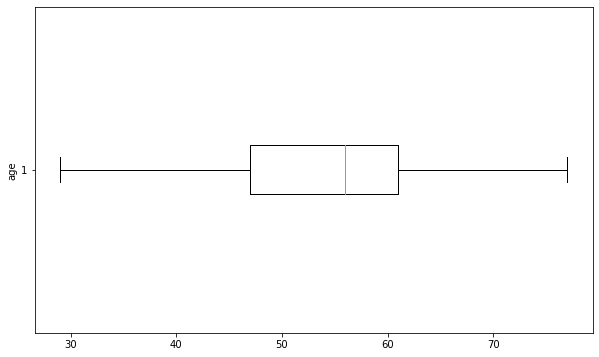

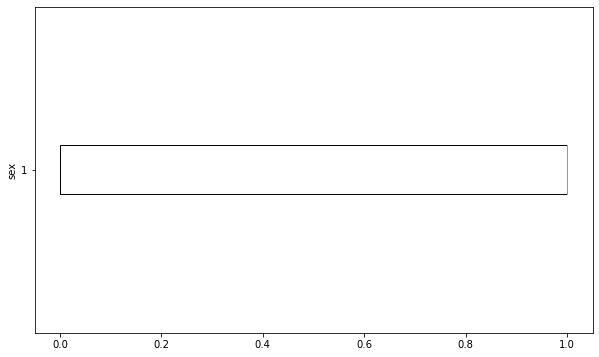

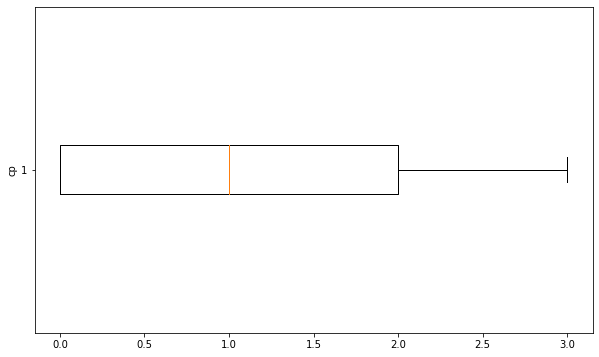

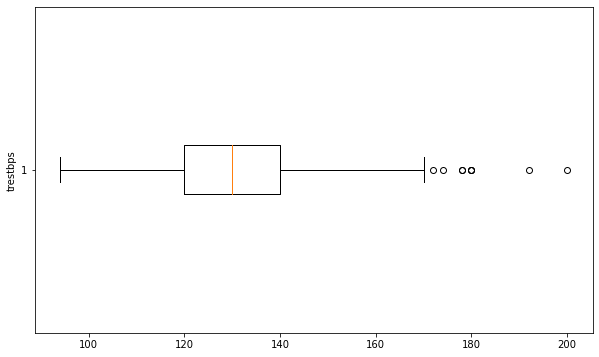

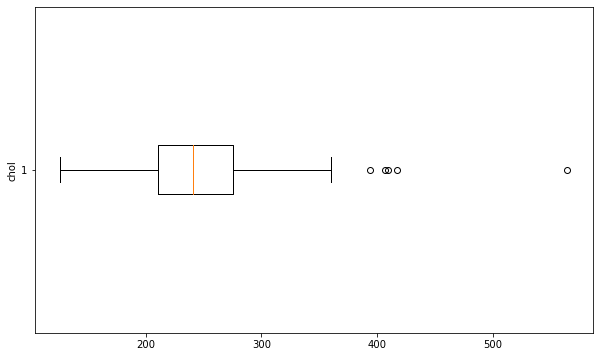

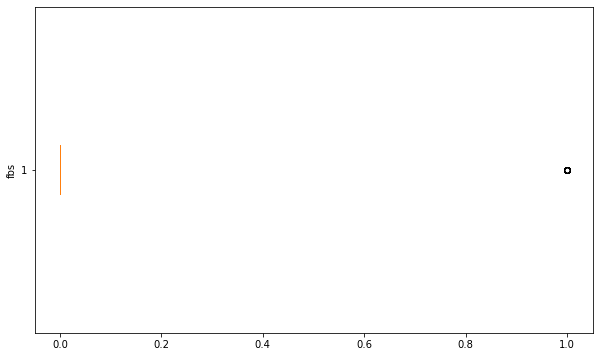

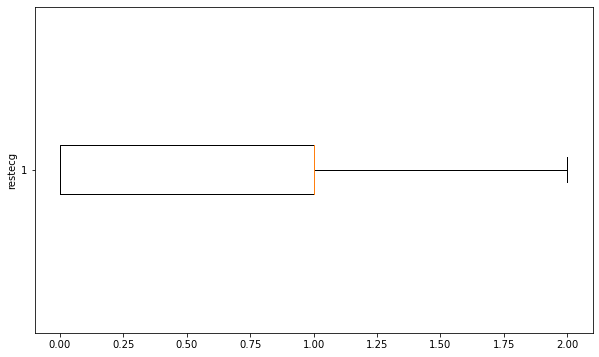

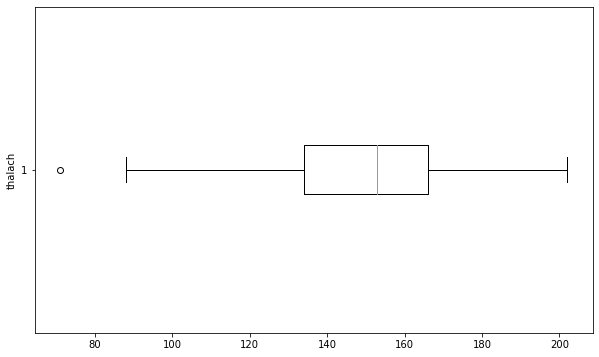

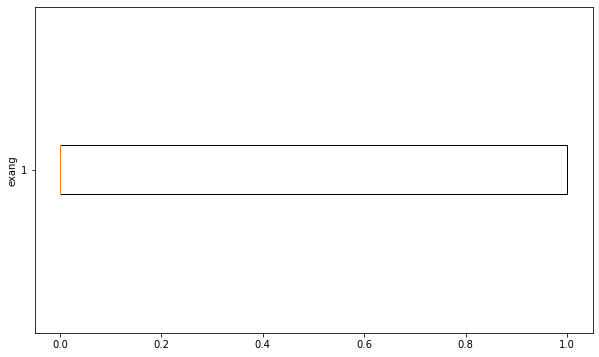

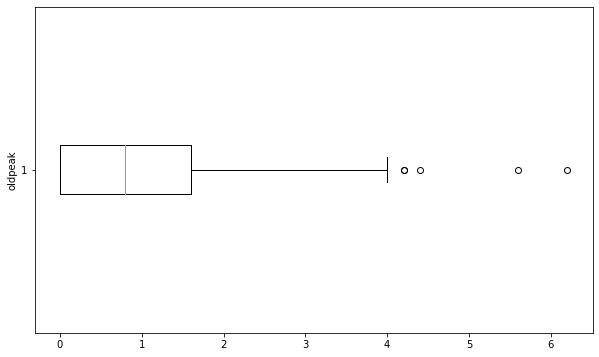

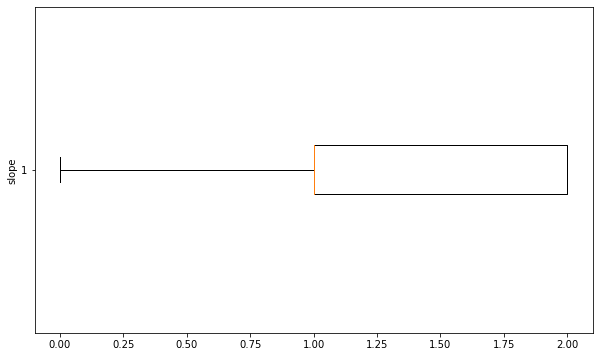

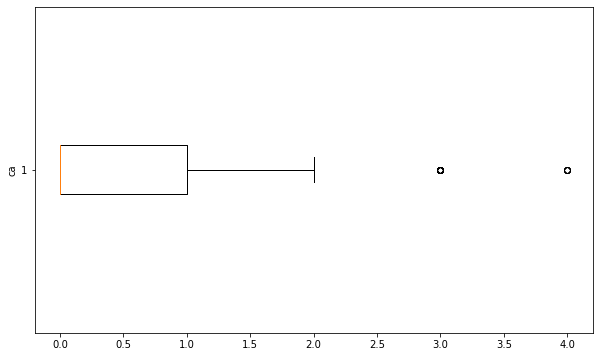

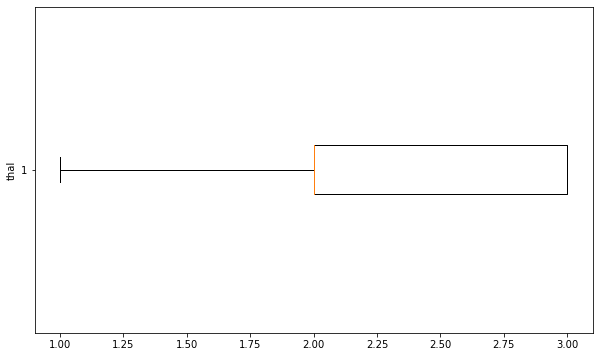

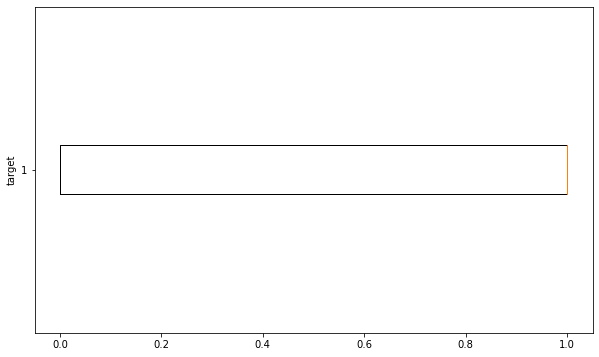

In [16]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    plt.figure()
    plt.boxplot(df[feature],vert=False)
    plt.ylabel(feature)
    plt.show()
       

In [17]:
##check if there is outlier or not
df=df[df.trestbps<175]
#df=df[df.chol<390]
df=df[df.thalach>55]
df=df[df.oldpeak<4]
df=df[df.ca<2.5]


In [18]:
df=pd.get_dummies(df,drop_first=True)


In [19]:
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_2,thal_3
0,63,145,233,150,2.300,0,1,1,0,0,1,1,0,0,0,0,0,0,0
1,37,130,250,187,3.500,0,1,1,0,1,0,0,1,0,0,0,0,1,0
2,41,130,204,172,1.400,0,1,0,1,0,0,0,0,0,0,0,1,1,0
3,56,120,236,178,0.800,0,1,1,1,0,0,0,1,0,0,0,1,1,0
4,57,120,354,163,0.600,0,1,0,0,0,0,0,1,0,1,0,1,1,0


In [20]:
df.shape

(267, 19)

# Data Preprocessing

In [21]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [25]:
log_model=LogisticRegression()

In [26]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
y_pred=log_model.predict(X_test_scaled)

In [28]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [29]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_2,thal_3,target,pred,pred_proba
188,50,140,233,163,0.600,1,1,0,1,0,...,1,0,0,1,0,0,1,0,0,0.360
13,64,110,211,144,1.800,0,1,0,0,1,...,0,0,1,1,0,1,0,1,1,0.599
263,63,108,269,169,1.800,2,0,0,0,0,...,1,0,1,1,0,1,0,0,0,0.183
299,45,110,264,132,1.200,0,1,0,0,1,...,1,0,0,1,0,0,1,0,1,0.594
239,35,126,282,156,0.000,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0.359
33,54,125,273,152,0.500,1,1,0,1,0,...,0,0,0,0,0,1,0,1,1,0.647
233,64,120,246,96,2.200,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0.114
104,50,129,196,163,0.000,0,1,0,1,0,...,1,0,0,0,1,1,0,1,1,0.956
4,57,120,354,163,0.600,0,0,0,0,0,...,1,0,1,0,1,1,0,1,1,0.889
39,65,160,360,151,0.800,0,0,0,1,0,...,0,0,0,0,1,1,0,1,1,0.966


In [30]:
#Without outlier
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  5]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        23
           1       0.85      0.94      0.89        31

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54



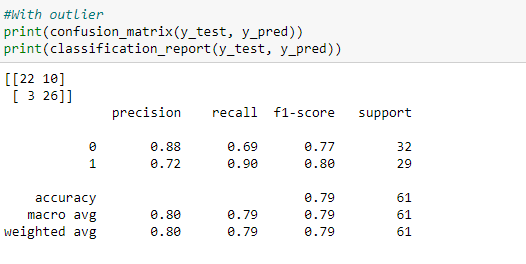

##### Logistic with GridSearch

In [31]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_scaled, y_train)
y_pred6=logreg_cv.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

[[18  5]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        23
           1       0.85      0.94      0.89        31

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54



In [32]:

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.8264069264069264


## Cross Validate

In [33]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.014,0.009,0.727,0.733,0.846,0.786
2,0.016,0.008,0.864,0.857,0.923,0.889
3,0.014,0.005,0.864,0.812,1.000,0.897
4,0.010,0.006,0.714,0.714,0.833,0.769
5,0.014,0.005,0.810,0.833,0.833,0.833
6,0.009,0.005,0.857,0.909,0.833,0.870
7,0.008,0.005,0.857,0.846,0.917,0.880
8,0.010,0.006,0.810,0.786,0.917,0.846
9,0.011,0.006,0.952,0.923,1.000,0.960
10,0.009,0.007,0.810,0.909,0.769,0.833


In [34]:
df_scores.mean()[2:]

test_accuracy    0.826
test_precision   0.832
test_recall      0.887
test_f1          0.856
dtype: float64

##### With outlier

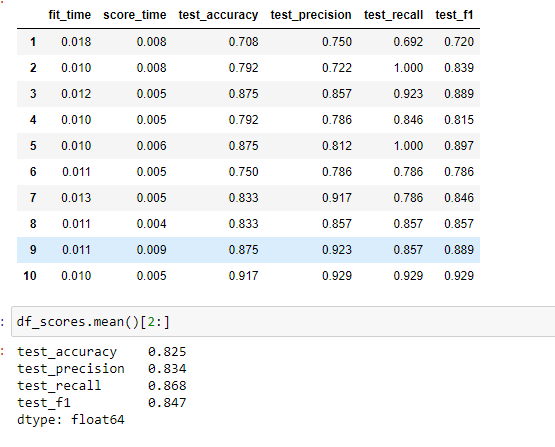

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

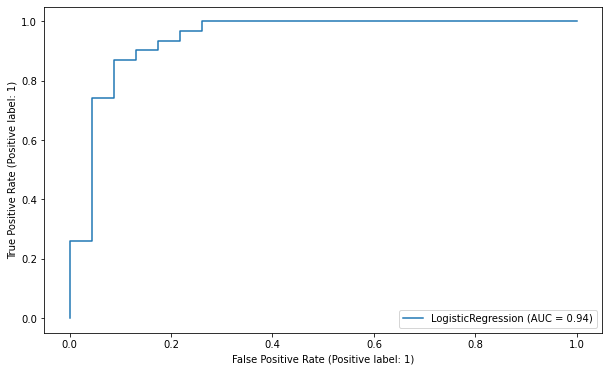

In [35]:
plot_roc_curve(log_model, X_test_scaled, y_test);

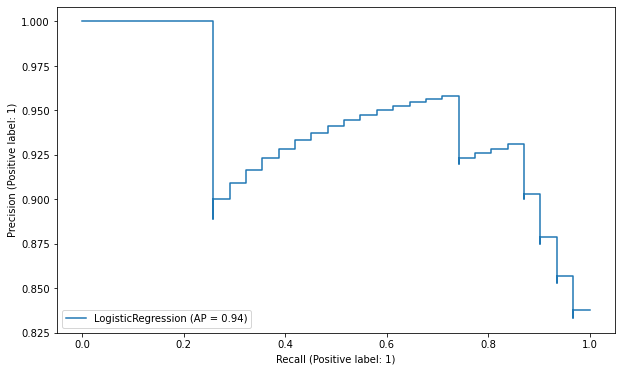

In [36]:
plot_precision_recall_curve(log_model, X_test_scaled, y_test);

## Finding Best Threshold

In [37]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [38]:
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])

In [39]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6469864823789508

In [40]:
test_data.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_2,thal_3,target,pred,pred_proba
190,51,130,305,142,1.200,0,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0.412
216,62,130,263,97,1.200,1,0,0,1,0,...,1,0,0,1,0,0,1,0,1,0.547
187,54,124,266,109,2.200,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0.029
176,60,117,230,160,1.400,2,1,0,0,0,...,1,0,1,0,1,0,1,0,0,0.060
194,60,140,185,155,3.000,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0.720


In [41]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [42]:
y_pred2 = test_data["pred2"]

In [43]:
#Without outlier
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[21  2]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        23
           1       0.93      0.87      0.90        31

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



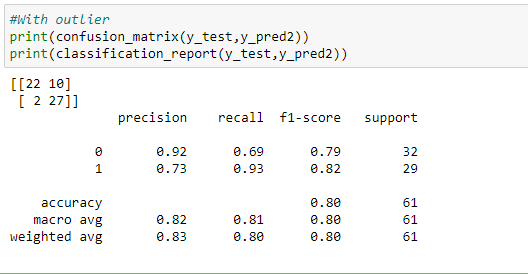

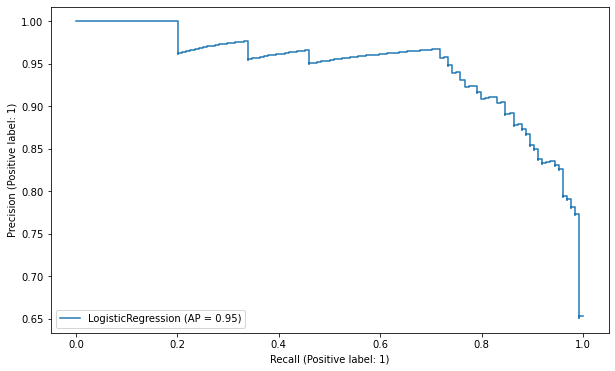

In [44]:
plot_precision_recall_curve(log_model, X_train_scaled, y_train);

In [45]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9454876992697663

In [46]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [47]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3527840579576928

In [48]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [49]:
y_pred3 = test_data["pred3"]

In [50]:
#Without outlier
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[14  9]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        23
           1       0.78      1.00      0.87        31

    accuracy                           0.83        54
   macro avg       0.89      0.80      0.81        54
weighted avg       0.87      0.83      0.82        54



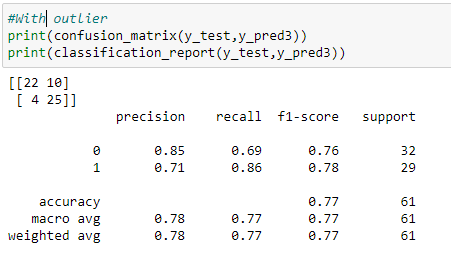

# Implement KNN and Evaluate

In [51]:
X_test.shape

(54, 18)

In [52]:
np.sqrt(53)

7.280109889280518

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=9)

In [54]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=9)

In [55]:
y_pred = knn_model.predict(X_test_scaled)

In [56]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

## Model Performance on Classification Tasks

In [57]:
confusion_matrix(y_test, y_pred)

array([[20,  3],
       [ 4, 27]], dtype=int64)

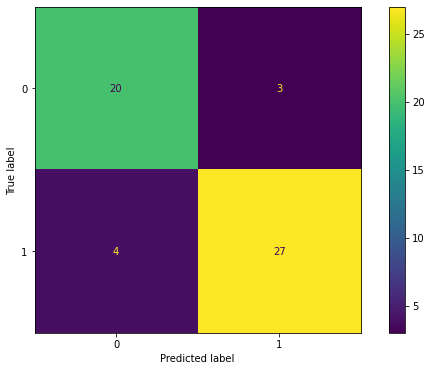

In [58]:
plot_confusion_matrix(knn_model, X_test_scaled, y_test);

In [59]:

### Wİthout outlier & KNN with 9
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[20  3]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.90      0.87      0.89        31

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



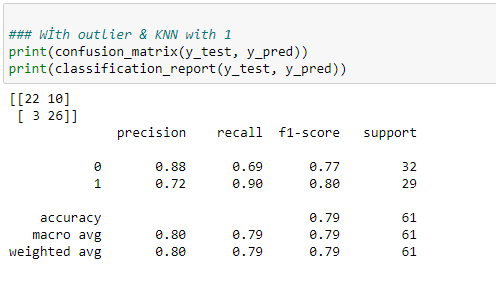

## Elbow Method for Choosing Reasonable K Values

In [60]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - recall_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0, 0.5, 'Error Rate')

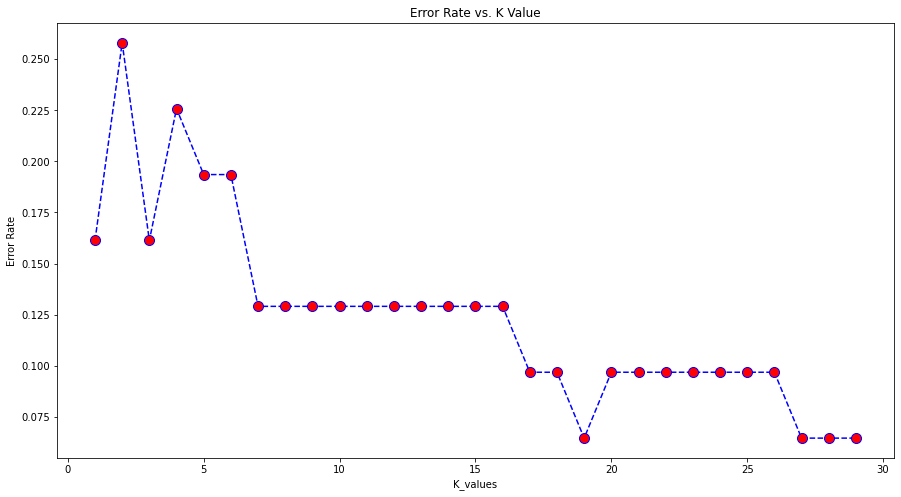

In [61]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10,)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')


##### With Outlier
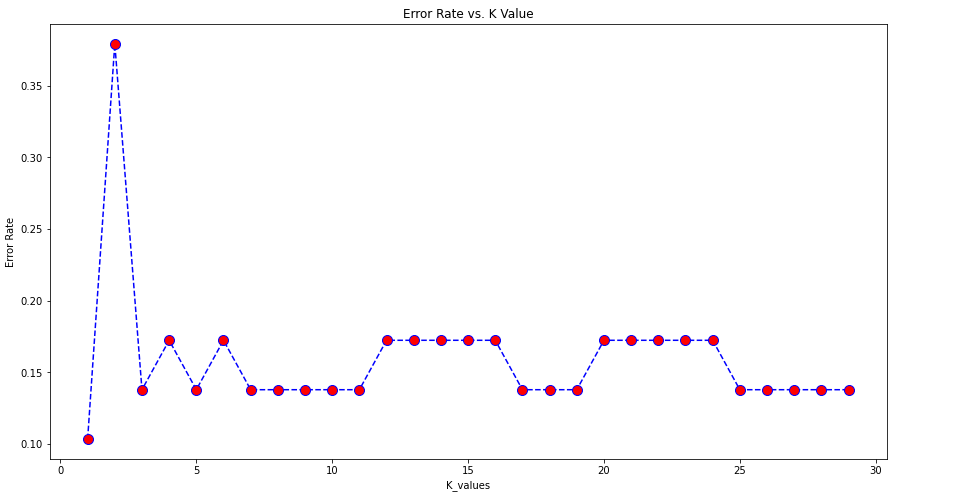

## Cross Validate For Optimal K Value

In [62]:
model = KNeighborsClassifier(n_neighbors=9)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.002,0.011,0.727,0.769,0.769,0.769
2,0.001,0.012,0.909,0.923,0.923,0.923
3,0.002,0.010,0.864,0.857,0.923,0.889
4,0.001,0.008,0.619,0.667,0.667,0.667
5,0.001,0.007,0.762,0.818,0.750,0.783
6,0.001,0.006,0.857,0.909,0.833,0.870
7,0.001,0.007,0.762,0.769,0.833,0.800
8,0.001,0.007,0.810,0.786,0.917,0.846
9,0.001,0.006,0.952,0.923,1.000,0.960
10,0.001,0.007,0.810,0.909,0.769,0.833


In [63]:
df_scores.mean()[2:]

test_accuracy    0.807
test_precision   0.833
test_recall      0.838
test_f1          0.834
dtype: float64

###### With Outlier
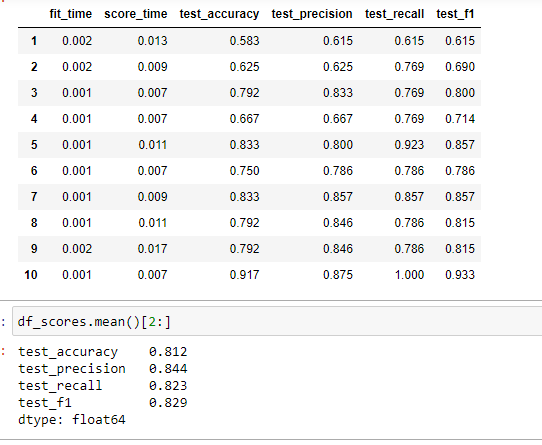

## Gridsearch Method for Choosing Reasonable K Values

In [64]:
knn_grid = KNeighborsClassifier()

In [65]:
k_values= range(1,30)

In [66]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [67]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [68]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [69]:
knn_grid_model.best_params_

{'n_neighbors': 23, 'p': 2, 'weights': 'uniform'}

In [70]:
# NOW WITH K=9
knn = KNeighborsClassifier(n_neighbors=9, p =1)

knn.fit(X_train_scaled,y_train)
pred = knn.predict(X_test_scaled)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=9


[[20  3]
 [ 4 27]]


              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.90      0.87      0.89        31

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



## Evaluating ROC Curves and AUC

In [71]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

Text(0.5, 1.0, 'Roc Curve With k=1 for X_test')

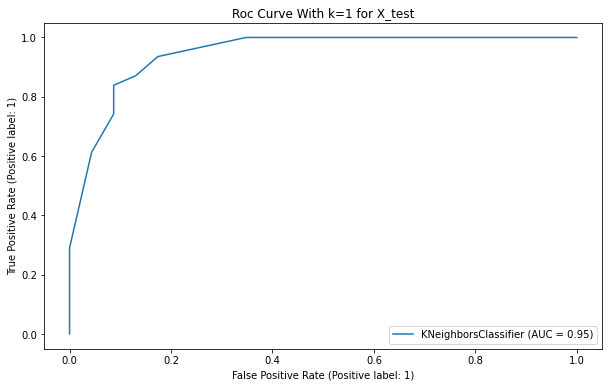

In [72]:
plot_roc_curve(knn_model, X_test_scaled, y_test)
plt.title("Roc Curve With k=1 for X_test")

Text(0.5, 1.0, 'Roc Curve With k=1 for X_train')

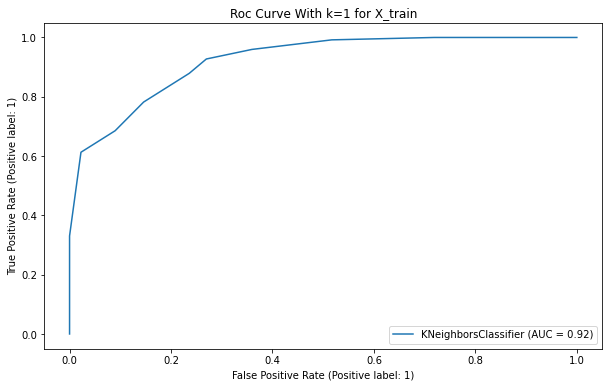

In [73]:
plot_roc_curve(knn_model, X_train_scaled, y_train)
plt.title("Roc Curve With k=1 for X_train")

## Pipeline K-Nearest Neighbors(KNN)

In [74]:
operations = [("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())]

In [75]:
pipe_model = Pipeline(steps=operations)

In [76]:
pipe_model.set_params(knn__n_neighbors= 9)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [77]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=9))])

In [78]:
y_pred = pipe_model.predict(X_test)

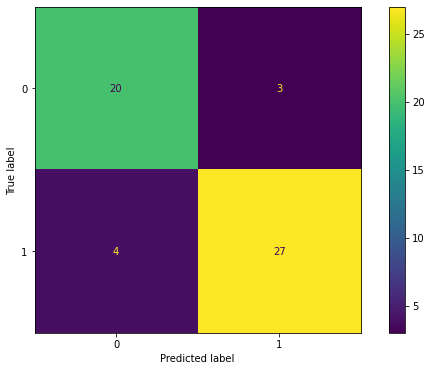

In [79]:
plot_confusion_matrix(pipe_model, X_test, y_test);

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        23
           1       0.90      0.87      0.89        31

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



In [81]:
#pipe_model.get_params()

## GridSearch on Pipeline

In [82]:
param_grid = {'knn__n_neighbors': range(1,30)}

In [83]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'f1')

In [84]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=9))]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='f1')

In [85]:
pipe_grid.best_params_

{'knn__n_neighbors': 23}

# Implement SVM and Evaluate

In [86]:
numeric_column=["age","trestbps","chol","thalach","oldpeak","target"]

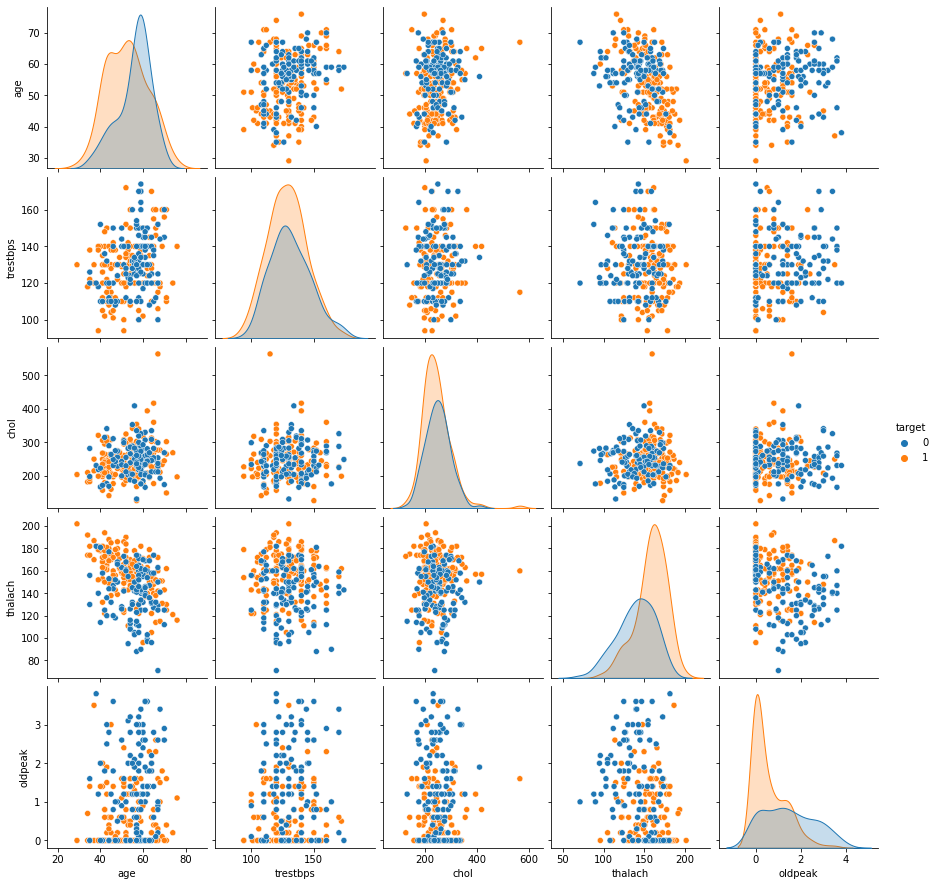

In [87]:
sns.pairplot(df[numeric_column],hue="target")

In [88]:
svm_model_scaled = SVC()
svm_model_scaled.fit(X_train_scaled, y_train)
y_pred = svm_model_scaled.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  5]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        23
           1       0.85      0.94      0.89        31

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54



In [89]:
model = SVC()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.812
test_precision   0.815
test_recall      0.878
test_f1          0.843
dtype: float64

### With Best Parameters (GridsearchCV)

In [90]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}
model = SVC()
svm_model_grid = GridSearchCV(model, param_grid, verbose=3, refit=True)
svm_model_grid.fit(X_train_scaled, y_train)




Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=auto, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=aut

[CV 3/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............

[CV 5/5] END .................C=10, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 3/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=10, gamma=0.0001, kernel=linear; total time=   0.0s
[CV 1/5] END .................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=100, gamma=scale, kernel=rbf; total time=   0.0s
[CV 1/5] END ..............C=100, gamma=scale, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C

[CV 2/5] END .................C=1000, gamma=1, kernel=linear; total time=   0.1s
[CV 3/5] END .................C=1000, gamma=1, kernel=linear; total time=   0.2s
[CV 4/5] END .................C=1000, gamma=1, kernel=linear; total time=   0.1s
[CV 5/5] END .................C=1000, gamma=1, kernel=linear; total time=   0.1s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.1s
[CV 3/5] END ...............C=1000, gamma=0.1, kernel=linear; total time=   0.2s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [91]:
svm_model_grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [92]:
y_pred = svm_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18  5]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.85      0.90      0.88        31

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.85        54
weighted avg       0.85      0.85      0.85        54



# Visually compare models based on your chosen metric

### SUMMARY

In [93]:
grid_model={LogisticRegression():{"C":[1], "penalty":["l2"]},KNeighborsClassifier():{"n_neighbors":range(1,30), "p": [1,2], "weights": ['uniform', "distance"]},SVC():{'C': [0.1,1, 10, 100, 1000],
              'gamma': [0.1],
              'kernel': ['rbf']}}

In [94]:
count=0
for i in grid_model:
    count+=1
    model=i
    model_gridCV = GridSearchCV(model, grid_model[i], cv=10)
    model_gridCV.fit(X_train_scaled,y_train)
    y_pred=model_gridCV.predict(X_test_scaled)
    if count==1:
        model.fit(X_train_scaled,y_train)
        y_pred_pro=model.predict_proba(X_test_scaled)
        optimal_threshold =0.31
        y_pred2=pd.DataFrame(y_pred_pro)[1].apply(lambda x : 1 if x >= optimal_threshold else 0)
        print(f"The model is: {i}, with optimal_threshold {optimal_threshold}")
        fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
        print(f"The AUC : {auc(fpr, tpr)}")
        print(confusion_matrix(y_test, y_pred2))
        print(classification_report(y_test, y_pred2))
        print("-----------------------------")
        print(f"The model is: {i},scoring: Recall, best parameter: {model_gridCV.best_params_}")
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        print(f"The AUC : {auc(fpr, tpr)}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
    else : 
        print("deneme")
        print(f"The model is: {i},scoring: Recall, best parameter: {model_gridCV.best_params_}")
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        print(f"The AUC : {auc(fpr, tpr)}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("-----------------------------")
    
    

The model is: LogisticRegression(), with optimal_threshold 0.31
The AUC : 0.782608695652174
[[13 10]
 [ 0 31]]
              precision    recall  f1-score   support

           0       1.00      0.57      0.72        23
           1       0.76      1.00      0.86        31

    accuracy                           0.81        54
   macro avg       0.88      0.78      0.79        54
weighted avg       0.86      0.81      0.80        54

-----------------------------
The model is: LogisticRegression(),scoring: Recall, best parameter: {'C': 1, 'penalty': 'l2'}
The AUC : 0.859046283309958
[[18  5]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.84        23
           1       0.85      0.94      0.89        31

    accuracy                           0.87        54
   macro avg       0.88      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54

deneme
The model is: KNeighborsClassifier(),scoring: Recall, bes

# Chose best model and make a random prediction 

In [95]:
scaler = MinMaxScaler().fit(X)

In [96]:
pickle.dump(scaler, open("scaler_heart_Stroke", 'wb'))

In [97]:
X_scaled = scaler.transform(X)

In [98]:
final_model = LogisticRegression().fit(X_scaled, y)

In [99]:
pickle.dump(final_model, open("final_model_heart_Stroke", 'wb'))

In [100]:
X.describe()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_2,thal_3
count,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000,267.000
mean,53.936,129.772,245.131,150.805,0.945,0.502,0.674,0.176,0.288,0.082,0.131,0.517,0.007,0.311,0.453,0.487,0.581,0.360
std,9.044,15.782,51.086,22.862,1.014,0.717,0.470,0.382,0.454,0.275,0.338,0.501,0.086,0.464,0.499,0.501,0.494,0.481
min,29.000,94.000,126.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,46.500,120.000,210.500,138.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,55.000,130.000,240.000,155.000,0.600,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
75%,60.000,140.000,271.000,168.000,1.600,1.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000
max,76.000,174.000,564.000,202.000,3.800,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [101]:
#age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal	target
my_dict = {"age": [55, 45, 65],
           "sex": [1, 0, 1],
           "cp": [1, 3, 0],
           "trestbps": [110, 150, 95],
           "chol": [300, 230, 130],
           "fbs": [0, 1, 1],
           "restecg": [0, 2, 1],
           "thalach": [160, 180, 170],
            "exang": [0, 1, 1],
           "oldpeak": [2, 0.6, 1.5],
           "slope": [0, 1, 1],
           "ca": [0.5, 1, 1.5],
           "thal": [1, 1, 1],
           "thalach": [100, 120, 160]
          }

In [102]:
my_dict = pd.DataFrame(my_dict)
my_dict

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55,1,1,110,300,0,0,100,0,2.000,0,0.500,1
1,45,0,3,150,230,1,2,120,1,0.600,1,1.000,1
2,65,1,0,95,130,1,1,160,1,1.500,1,1.500,1


In [103]:
my_dict=pd.get_dummies(my_dict)

In [104]:
for feature in object_col:
    my_dict[feature]=my_dict[feature].astype('object')

In [105]:
my_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3 non-null      int64  
 1   sex       3 non-null      object 
 2   cp        3 non-null      object 
 3   trestbps  3 non-null      int64  
 4   chol      3 non-null      int64  
 5   fbs       3 non-null      object 
 6   restecg   3 non-null      object 
 7   thalach   3 non-null      int64  
 8   exang     3 non-null      object 
 9   oldpeak   3 non-null      float64
 10  slope     3 non-null      object 
 11  ca        3 non-null      float64
 12  thal      3 non-null      object 
dtypes: float64(2), int64(4), object(7)
memory usage: 440.0+ bytes


In [106]:
my_dict=pd.get_dummies(my_dict)

In [107]:
my_dict

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_0,cp_1,...,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,thal_1
0,55,110,300,100,2.000,0.500,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
1,45,150,230,120,0.600,1.000,1,0,0,0,...,0,1,0,0,1,0,1,0,1,1
2,65,95,130,160,1.500,1.500,0,1,1,0,...,0,1,0,1,0,0,1,0,1,1


In [108]:
my_dict = my_dict.reindex(columns=X.columns, fill_value=0)
my_dict

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_2,thal_3
0,55,110,300,100,2.000,0.500,1,1,0,0,0,0,0,0,0,0,0,0
1,45,150,230,120,0.600,1.000,0,0,0,1,1,0,1,1,1,0,0,0
2,65,95,130,160,1.500,1.500,1,0,0,0,1,1,0,1,1,0,0,0


In [109]:
my_dict =scaler.transform(my_dict)

In [110]:
#Without Threshold
pred=final_model.predict(my_dict)
pred

array([0, 1, 0], dtype=int64)

In [111]:
#With Threshold
optimal_threshold=0.31
pred = final_model.predict(my_dict)
pred_proba = final_model.predict_proba(my_dict)
pred2 = [1 if i >= optimal_threshold else 0 for i in pred_proba[:,1]]
pred2

[1, 1, 0]